In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python locations.py 
```
from the top level directory.

In [2]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

sc.fill_buildings(student_df = student_df, hall_df = hall_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [3]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s, region_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a, region_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get building capacity column vector.
building_capacity = sc.get_building_capacity_df().values

# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df, 
                                    alpha = -1)

In [4]:
cost_df

,0,1,2,3,4,5,6,7,8,9,...,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128
aidekman,1.000135,1.000135,1.000136,1.000135,1.000136,1.000135,1.000136,1.000135,1.000134,1.000144,...,1.000147,1.000144,1.000144,1.000147,1.000145,1.000144,1.000145,1.000147,1.000144,1.000144
anderson,1.000145,1.000145,1.000146,1.000145,1.000146,1.000145,1.000146,1.000145,1.000144,1.000155,...,1.000158,1.000155,1.000155,1.000158,1.000157,1.000155,1.000157,1.000158,1.000155,1.000155
ballou,1.000117,1.000117,1.000118,1.000117,1.000118,1.000117,1.000118,1.000117,1.000117,1.000125,...,1.000127,1.000125,1.000125,1.000127,1.000126,1.000125,1.000126,1.000127,1.000125,1.000125
capen_house,1.044556,1.044556,1.042809,1.044556,1.042809,1.044556,1.042809,1.044556,1.045746,1.042022,...,1.044872,1.042022,1.042054,1.044872,1.042965,1.042022,1.042965,1.044872,1.042022,1.042022
clic,1.000145,1.000145,1.000146,1.000145,1.000146,1.000145,1.000146,1.000145,1.000144,1.000155,...,1.000158,1.000155,1.000155,1.000158,1.000157,1.000155,1.000157,1.000158,1.000155,1.000155
dental_school,1.001003,1.001003,1.001013,1.001003,1.001013,1.001003,1.001013,1.001003,1.001,1.001061,...,1.001044,1.001061,1.001059,1.001044,1.001058,1.001061,1.001058,1.001044,1.001061,1.001061
eaton_hall,1.000193,1.000193,1.000194,1.000193,1.000194,1.000193,1.000194,1.000193,1.000192,1.000205,...,1.00021,1.000205,1.000205,1.00021,1.000207,1.000205,1.000207,1.00021,1.000205,1.000205
fine_arts_house,1.00018,1.00018,1.00018,1.00018,1.00018,1.00018,1.00018,1.00018,1.000178,1.00019,...,1.000195,1.00019,1.00019,1.000195,1.000193,1.00019,1.000193,1.000195,1.00019,1.00019
gifford_house,1.000299,1.000299,1.000301,1.000299,1.000301,1.000299,1.000301,1.000299,1.000297,1.000318,...,1.000324,1.000318,1.000318,1.000324,1.000322,1.000318,1.000322,1.000324,1.000318,1.000318
goddard_chapel,1.000299,1.000299,1.000301,1.000299,1.000301,1.000299,1.000301,1.000299,1.000297,1.00032,...,1.000324,1.00032,1.000319,1.000324,1.000323,1.00032,1.000323,1.000324,1.00032,1.00032


In [5]:
# Get art capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df)

# Reduce cost df to remove duplicate columns.
art_capacity = art_capacity_df["capacity"].values.reshape(-1,1)
cost_df = cost_df.loc[:,art_capacity_df["original_index"].values]

P = sc.learn_optimal_assignment(cost_df, 
                             building_capacity, 
                             art_capacity, 
                             lam = 10) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
assignment_df = pd.DataFrame(P, index = cost_df.index,
                  columns = art_capacity_df["tuples"].values)

# Create Heatmap Visualization

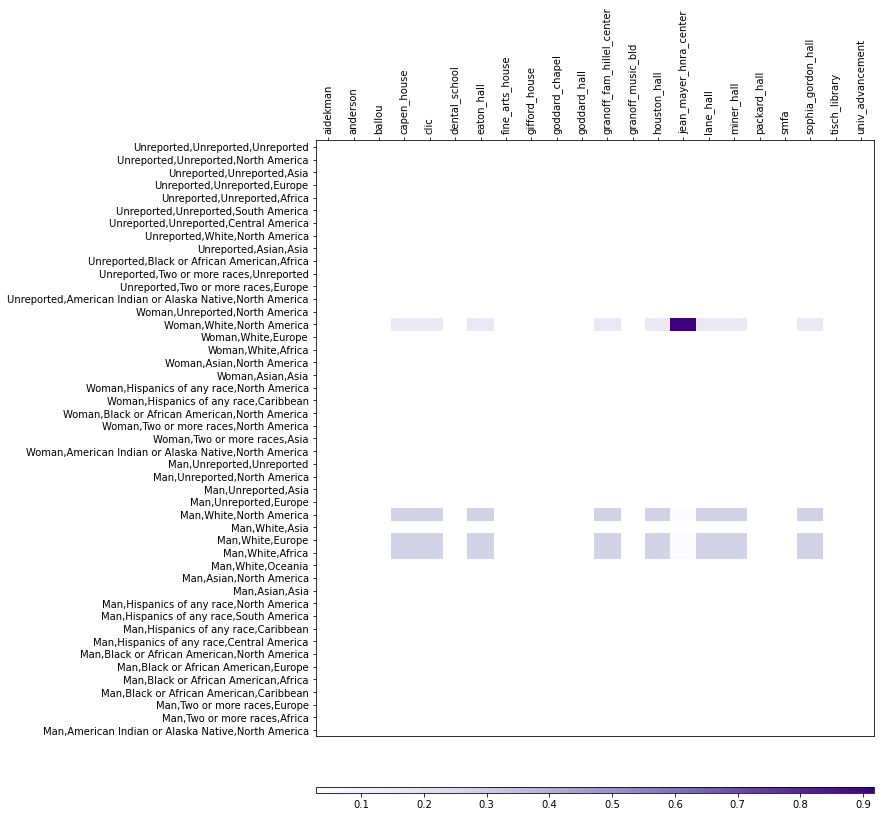

In [6]:
sc.assignment_heatmat(assignment_df)